Load the dataset into a Pandas DataFrame. Used the pandas.read_csv function to read the dataset into a DataFrame.

In [33]:
import numpy as np
import pandas as pd

df = pd.read_csv('training.1600000.processed.noemoticon.csv', sep=',', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

df= df.iloc[600000:1000000]

Explore the data by printing some sample rows and examining the structure of the DataFrame. I used the head to get an overview of the data

In [ ]:
df.head()

In [34]:
df['target'].value_counts()

0    200000
4    200000
Name: target, dtype: int64

In [36]:
pd.isnull(df).sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [38]:
target = df.target
text = df.text

In [40]:
# Questions:
# 1. Explore and prepare the data (Tokenization, Stemming, Stopwords, visualization, etc.)
# 2. Build a BOW and train a KNN, Decision Tree, and SVM model
# 3. Evaluate the above models (confusion matrix, accuracy, classification report, etc.)
# 4. Use one of the word embeddings (word2vec, Glove, fasText) and build a CNN model
# and compare the result with question 2.
# 5. Build an API or a user interface to use the trained CNN model in production (this
# question is optional)

Tokenize the text of the tweets using a suitable tokenization method. I can also consider using regular expressions or a custom tokenization function if necessary.

In [41]:
#Tokenization

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

text = text.apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darklane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darklane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Perform stemming and remove stopwords. Stemming is the process of reducing words to their base form, and stopwords are common words that do not contribute much meaning to the text (e.g., "a", "an", "the"). I used NLTK's PorterStemmer and stopwords functions for this purpose.

In [42]:
#remove stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

text = text.apply(lambda x: [item for item in x if item not in stop_words])



In [ ]:
#Stemming

from nltk.stem import PorterStemmer
ps = PorterStemmer()

text = text.apply(lambda x: [ps.stem(item) for item in x])

Visualize the data by plotting word frequencies or creating word clouds. This gives a sense of the most common words in the dataset and help to identify patterns and trends.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


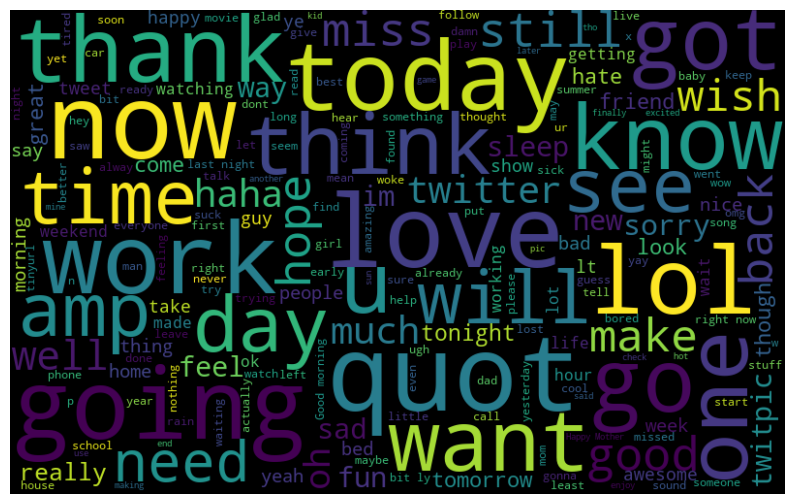

In [45]:
# visualization 

import matplotlib.pyplot as plt
import seaborn as sns

#wordcloud
# %pip install wordcloud
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Preprocess the data by converting the text to a numerical representation. I used Bag of Words (BOW) techniques to convert the text into numerical features. You can use scikit-learn's CountVectorizer functions for this purpose.

In [46]:
#Building a BOW

from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=1000, ngram_range=(1,3))
bow.fit(df['text'])

CountVectorizer(max_features=1000, ngram_range=(1, 3))

Split the data into training and testing sets using scikit-learn's train_test_split function. You can use the training set to build and train your models, and the testing set to evaluate the performance of your models.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=0)

Train a KNN model using the BOW features and the sentiment labels as the target variable. You can use scikit-learn's KNeighborsClassifier for this purpose.

In [49]:
# train a KNN

from sklearn.neighbors import KNeighborsClassifier

X_train = bow.transform(X_train)
X_test = bow.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [ ]:
#kears knn

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


In [ ]:
# train a Decision Tree

import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier



In [ ]:
y_test.value_counts()

0    10000
Name: target, dtype: int64

In [ ]:
# accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

1.0